In [1]:
from logistic_regression import LogisticRegressionImpl
from neural_network import NeuralNetworkImpl
from sklearn.linear_model import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

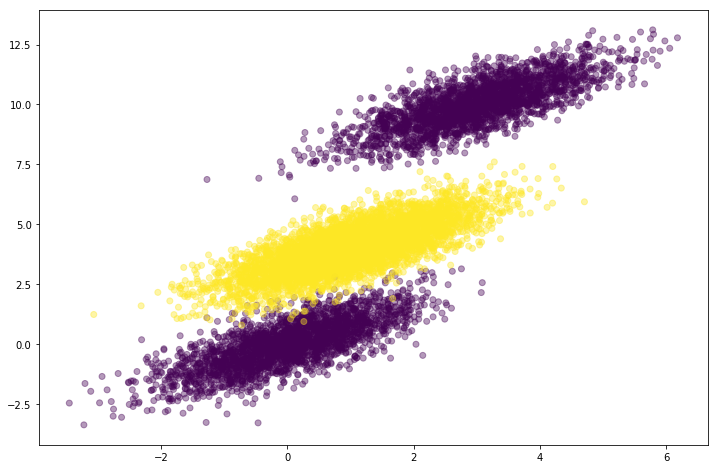

In [2]:
# Data generation, see the visualization below for what the dataset looks like.
np.random.seed(12)
num_samples = 10000

negative_points1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], int(num_samples/2))
negative_points2 = np.random.multivariate_normal([3, 10], [[1, .75],[.75, 1]], int(num_samples/2))
positive_points = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_samples)

all_points = np.vstack((negative_points1[:int(num_samples/4)],
    negative_points2[:int(num_samples/4)],
    positive_points[:int(num_samples/2)])).astype(np.float32)
point_labels = np.hstack((np.zeros(int(num_samples/2)), np.ones(int(num_samples/2))))

test_points = np.vstack((negative_points1[int(num_samples/4):],
    negative_points2[int(num_samples/4):],
    positive_points[int(num_samples/2):])).astype(np.float32)
test_labels = np.hstack((np.zeros(int(num_samples/2)), np.ones(int(num_samples/2))))

plt.figure(figsize=(12,8))
plt.scatter(all_points[:, 0], all_points[:, 1], c = point_labels, alpha = .4)
plt.show()

In [11]:
# Train the logistic regression implementation using the default parameters
model = LogisticRegressionImpl()
model.train(all_points.T, point_labels.reshape(1, len(point_labels)))

=== iteration 0, cost: 0.6931471805599453, accuracy: 0.5
=== iteration 10000, cost: 0.6781715460792269, accuracy: 0.5675
W = [-0.28421466  0.02099933], b = 0.2605555314723628


In [12]:
# Train a scikit-learn logistic regression model
model2 = LogisticRegression(fit_intercept=True, C = 1e2)
model2.fit(all_points, point_labels)
print("Train accuracy: {}".format(model2.score(all_points, point_labels)))
print("W: {}".format(model2.coef_))
print("b: {}".format(model2.intercept_))

Train accuracy: 0.5676
W: [[-0.28622531  0.02166392]]
b: [ 0.26007988]


In [13]:
# Check the accuracy on the test data
m = len(test_points)
predicted_labels = np.squeeze(model.predict(test_points.T))
accuracy = (m - np.sum(np.absolute(predicted_labels - test_labels))) / m
print("Custom model test accuracy: {}".format(accuracy))

predicted_labels = model2.predict(test_points)
accuracy = (m - np.sum(np.absolute(predicted_labels - test_labels))) / m
print("Scikit-learn model test accuracy: {}".format(accuracy))

Custom model test accuracy: 0.5637
Scikit-learn model test accuracy: 0.5636


Parameters to train: 44
=== iteration 0, cost: 0.7077894483231015, accuracy: 0.546875
=== iteration 10, cost: 0.5658220431023319, accuracy: 0.6875
=== iteration 20, cost: 0.20774002631566443, accuracy: 0.984375
=== iteration 30, cost: 0.06373230868516032, accuracy: 1.0
=== iteration 40, cost: 0.03826072099644019, accuracy: 1.0
=== iteration 50, cost: 0.029533145393879953, accuracy: 1.0
=== iteration 60, cost: 0.024923487162641388, accuracy: 1.0
=== iteration 70, cost: 0.022513086847158626, accuracy: 1.0
=== iteration 80, cost: 0.02086742797877766, accuracy: 1.0
=== iteration 90, cost: 0.019673621474689578, accuracy: 1.0


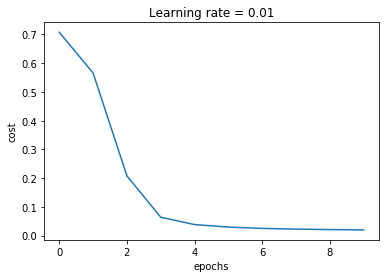

In [14]:
# Let's try a neural net implementation with two hidden layers and one logistic output.
model_nn = NeuralNetworkImpl(layer_sizes=[5, 4, 1], layer_activations=['relu', 'relu', 'sigmoid'], epochs=100)
model_nn.train(all_points.T, point_labels.reshape(1, len(point_labels)))

In [15]:
# The neural net, as expected, performs much better.
predicted_labels = model_nn.predict(test_points.T)
accuracy = (m - np.sum(np.absolute(predicted_labels - test_labels))) / m
print("Neural net model test accuracy: {}".format(accuracy))

Neural net model test accuracy: 0.9966
